In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [91]:
# read raw data into python

df = pd.read_excel('C:/Users/lilia/Desktop/Udacity/Project_1/Data.xlsx')
df.head()

,wbid,BODY,rawData_periodOfRecordQuery.class,NAME1,BASIN,sta,LAT,LONG,Year,Month,...,xCode,dUnits2,agency,labName,masterCode2,floridaStandards_forMatching.class,thisCriteria,floridaStandards_forMatching.Units,standardWithUnits,criterionText
0,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,COND,3F,1275.0,uohm/cm,1275 or >50% Nat. Background,Criterion from the Florida Standards for this ...
2,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,NaN,m,21FLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2189A,STREAM,3F,RUSHING CR. TRIB @ HOLSTEIN DR,RUSHING BRANCH (FRESHWATER SEGMENT),21FLA 20030603,30.458707,-81.566378,2012,9,...,B,m,21FLA,Columbia Analytical Services,FCOLI,3F,400.0,100ml,=400 MPN,Criterion from the Florida Standards for this ...


In [92]:
# Check what columns are there in the dataframe
print(df.columns)

Index(['wbid', 'BODY', 'rawData_periodOfRecordQuery.class', 'NAME1', 'BASIN',
       'sta', 'LAT', 'LONG', 'Year', 'Month', 'Day', 'Time', 'ID', 'depth',
       'param', 'result', 'rawData_periodOfRecordQuery.Units', 'rcode', 'lab',
       'GROUP_NAME', 'GROUP_NUM', 'PLANUNIT', 'description', 'epa', 'week2',
       'season', 'ds', 'Master parameter Code', 'subcategory',
       'Master parameter', 'cycle', 'begin_pp', 'end_pp', 'begin_vp', 'end_vp',
       'mdl', 'pql', 'staName', 'planPeriod', 'verPeriod', 'assessmentType',
       'xCode', 'dUnits2', 'agency', 'labName', 'masterCode2',
       'floridaStandards_forMatching.class', 'thisCriteria',
       'floridaStandards_forMatching.Units', 'standardWithUnits',
       'criterionText'],
      dtype='object')


In [93]:
# Create a dataframe with selected columns

dfs = df[df.columns[df.columns.isin(['ID','Year','Month','Day','result','Master parameter'])]]

In [94]:
# Create dissolved oxygen (DO), chlorophyll-a (CHLAC), total phosphorus (TP), total nitrogen (TN), 
# temperature (TEMP), and salinity (SALIN) dataframes

dfs_DO = dfs.loc[df['Master parameter Code']== 'DO']

In [95]:
dfs_CHLAC = dfs.loc[df['Master parameter Code']== 'CHLAC']

In [96]:
dfs_TP = dfs.loc[df['Master parameter Code']== 'TP']

In [97]:
dfs_TN = dfs.loc[df['Master parameter Code']== 'TN']

In [114]:
dfs_TEMP = dfs.loc[df['Master parameter Code']== 'TEMP']

In [115]:
dfs_SALIN = dfs.loc[df['Master parameter Code']== 'SALIN']

In [116]:
# Join above dataframes together on column "ID" and create a new final dataframe: df_final

dfs_DO_CHLAC = pd.merge(dfs_DO, dfs_CHLAC, on=['ID','Year','Month','Day'], how='outer', suffixes=('_DO','_CHLAC'))

In [117]:
dfs_DO_CHLAC_TP = pd.merge(dfs_DO_CHLAC, dfs_TP, on = ['ID','Year','Month','Day'], how = 'outer')

In [118]:
dfs_DO_CHLAC_TP_TN = pd.merge(dfs_DO_CHLAC_TP, dfs_TN, on = ['ID','Year','Month','Day'], how = 'outer', suffixes=('_TP','_TN'))

In [119]:
dfs_DO_CHLAC_TP_TN_TEMP = pd.merge(dfs_DO_CHLAC_TP_TN, dfs_TEMP, on = ['ID','Year','Month','Day'], how = 'outer')

In [120]:
df_final = pd.merge(dfs_DO_CHLAC_TP_TN_TEMP, dfs_SALIN, on = ['ID','Year','Month','Day'], how = 'outer', suffixes=('_TEMP','_SALIN'))

In [121]:
df_final.to_excel("Final.xlsx")

FileCreateError: [Errno 13] Permission denied: 'Final.xlsx'

In [122]:
# Clean final dataframe: replace NA with mean value for the numeric columns

df = df_final.dropna(subset=['result_DO'], axis=0)
y=df['result_DO']

In [123]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

C:\Users\lilia\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [124]:
# Build a multiple linear regression model

X = df[['result_CHLAC', 'result_TP', 'result_TN', 'result_TEMP', 'result_SALIN']]
y = df['result_DO']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [126]:
# Check regression results and make scatter plots of predicted VS actual dissolved oxygen data  

y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 

In [131]:
r2_score(y_train, y_train_preds)

0.4122900394581742

In [132]:
r2_score(y_test, y_test_preds)

-0.4969958704099007

Text(9, 10, 'R2 = 0.41')

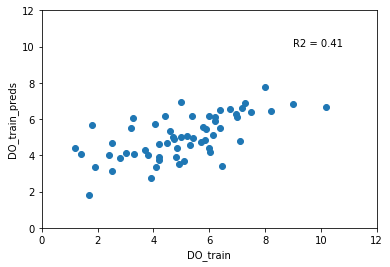

In [86]:
plt.scatter(y_train, y_train_preds) 
plt.xlabel('DO_train')
plt.ylabel('DO_train_preds')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.text(9,10, 'R2 = 0.41')

Text(9, 10, 'R2 = -0.5')

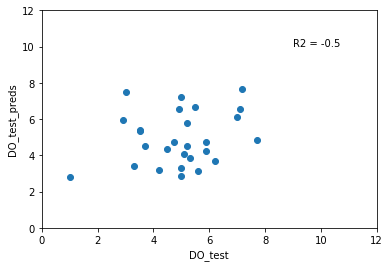

In [89]:
plt.scatter(y_test, y_test_preds) 
plt.xlabel('DO_test')
plt.ylabel('DO_test_preds')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.text(9,10, 'R2 = -0.5')

In [74]:
# Check regression model coefficient of each parameter

coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

In [75]:
coefs_df

,est_int,coefs,abs_coefs
4,result_SALIN,-14.821609,14.821609
1,result_TP,1.818215,1.818215
2,result_TN,1.527818,1.527818
3,result_TEMP,-0.283243,0.283243
0,result_CHLAC,0.194599,0.194599
